In [2]:
import pickle
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import config
import os
import data_utils
from adjustText import adjust_text
from numpy import linalg as LA

# 1. h1 t-SNE visualization

In [242]:
experiment_name = 'test_h1_record'
file_name = '20190301043603_ep2625.pickle'
#file_name = '20190228210824_ep0.pickle'
file_path = os.path.join(config.dir_h1_logs(), experiment_name, file_name)
print(file_path)

with open(file_path, 'rb') as f:
    data = pickle.load(f)
print(type(data))

h1_logs/test_h1_record/20190301043603_ep2625.pickle


In [244]:
print(data.keys())

dict_keys(['carry', 'output', 'input', 'operator', 'h1'])


In [245]:
print(data['input'].shape)
print(data['output'].shape)
print(data['h1'].shape)
print(data['carry'].shape)
print(data['operator'])

(256, 8)
(256, 8)
(256, 64)
(256,)
add


In [246]:
n_examples = data['h1'].shape[0]
op_texts = list()
for i in range(n_examples):
    op_text = '[{carries}] {str_operation}'.format(
        carries=data['carry'][i],
        str_operation=data_utils.np_io2str_op(data['input'][i], data['output'][i], data['operator'])
    )
    op_texts.append(op_text)

To implement.
- function to compute input similarity or output similarity. by digit similarity.
- Ratio of XOR relationship.

In [539]:
# t-SNE hyperparmeter setting
tsne = TSNE(n_components=2,  perplexity=5.0, n_iter=100000, init='pca')
# t-SNE fitting
X_2d = tsne.fit_transform(data['h1'])

In [540]:
df = pd.DataFrame({
    'x':X_2d[:,0],
    'y':X_2d[:,1],
    'carries':data['carry'],
    'op_text':op_texts
})

In [541]:
df.head()

,carries,op_text,x,y
0,0,[0] 0000 + 0000 = 00000000,56.736599,8.683804
1,0,[0] 0000 + 0001 = 00000001,41.870770,-41.516064
2,0,[0] 0000 + 0010 = 00000010,58.213688,-4.181747
3,0,[0] 0000 + 0011 = 00000011,52.769337,-16.984812
4,0,[0] 0000 + 0100 = 00000100,58.836452,9.361100


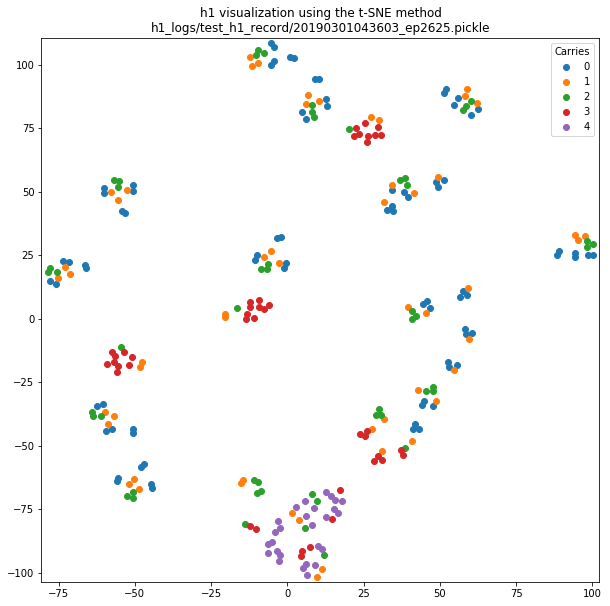

In [542]:
# figure configuartion
plt.figure(figsize=(10,10))
pad = 2
plt.xlim(df['x'].min() - pad, df['x'].max() + pad)
plt.ylim(df['y'].min() - pad, df['y'].max() + pad)
plt.title('h1 visualization using the t-SNE method\n{}'.format(file_path))

# scatter plot
for carries in df['carries'].unique():
    df_carries = df[df['carries'] == carries]
    plt.plot(df_carries['x'], df_carries['y'], 'o', label=carries)
plt.legend(title='Carries')
plt.show()

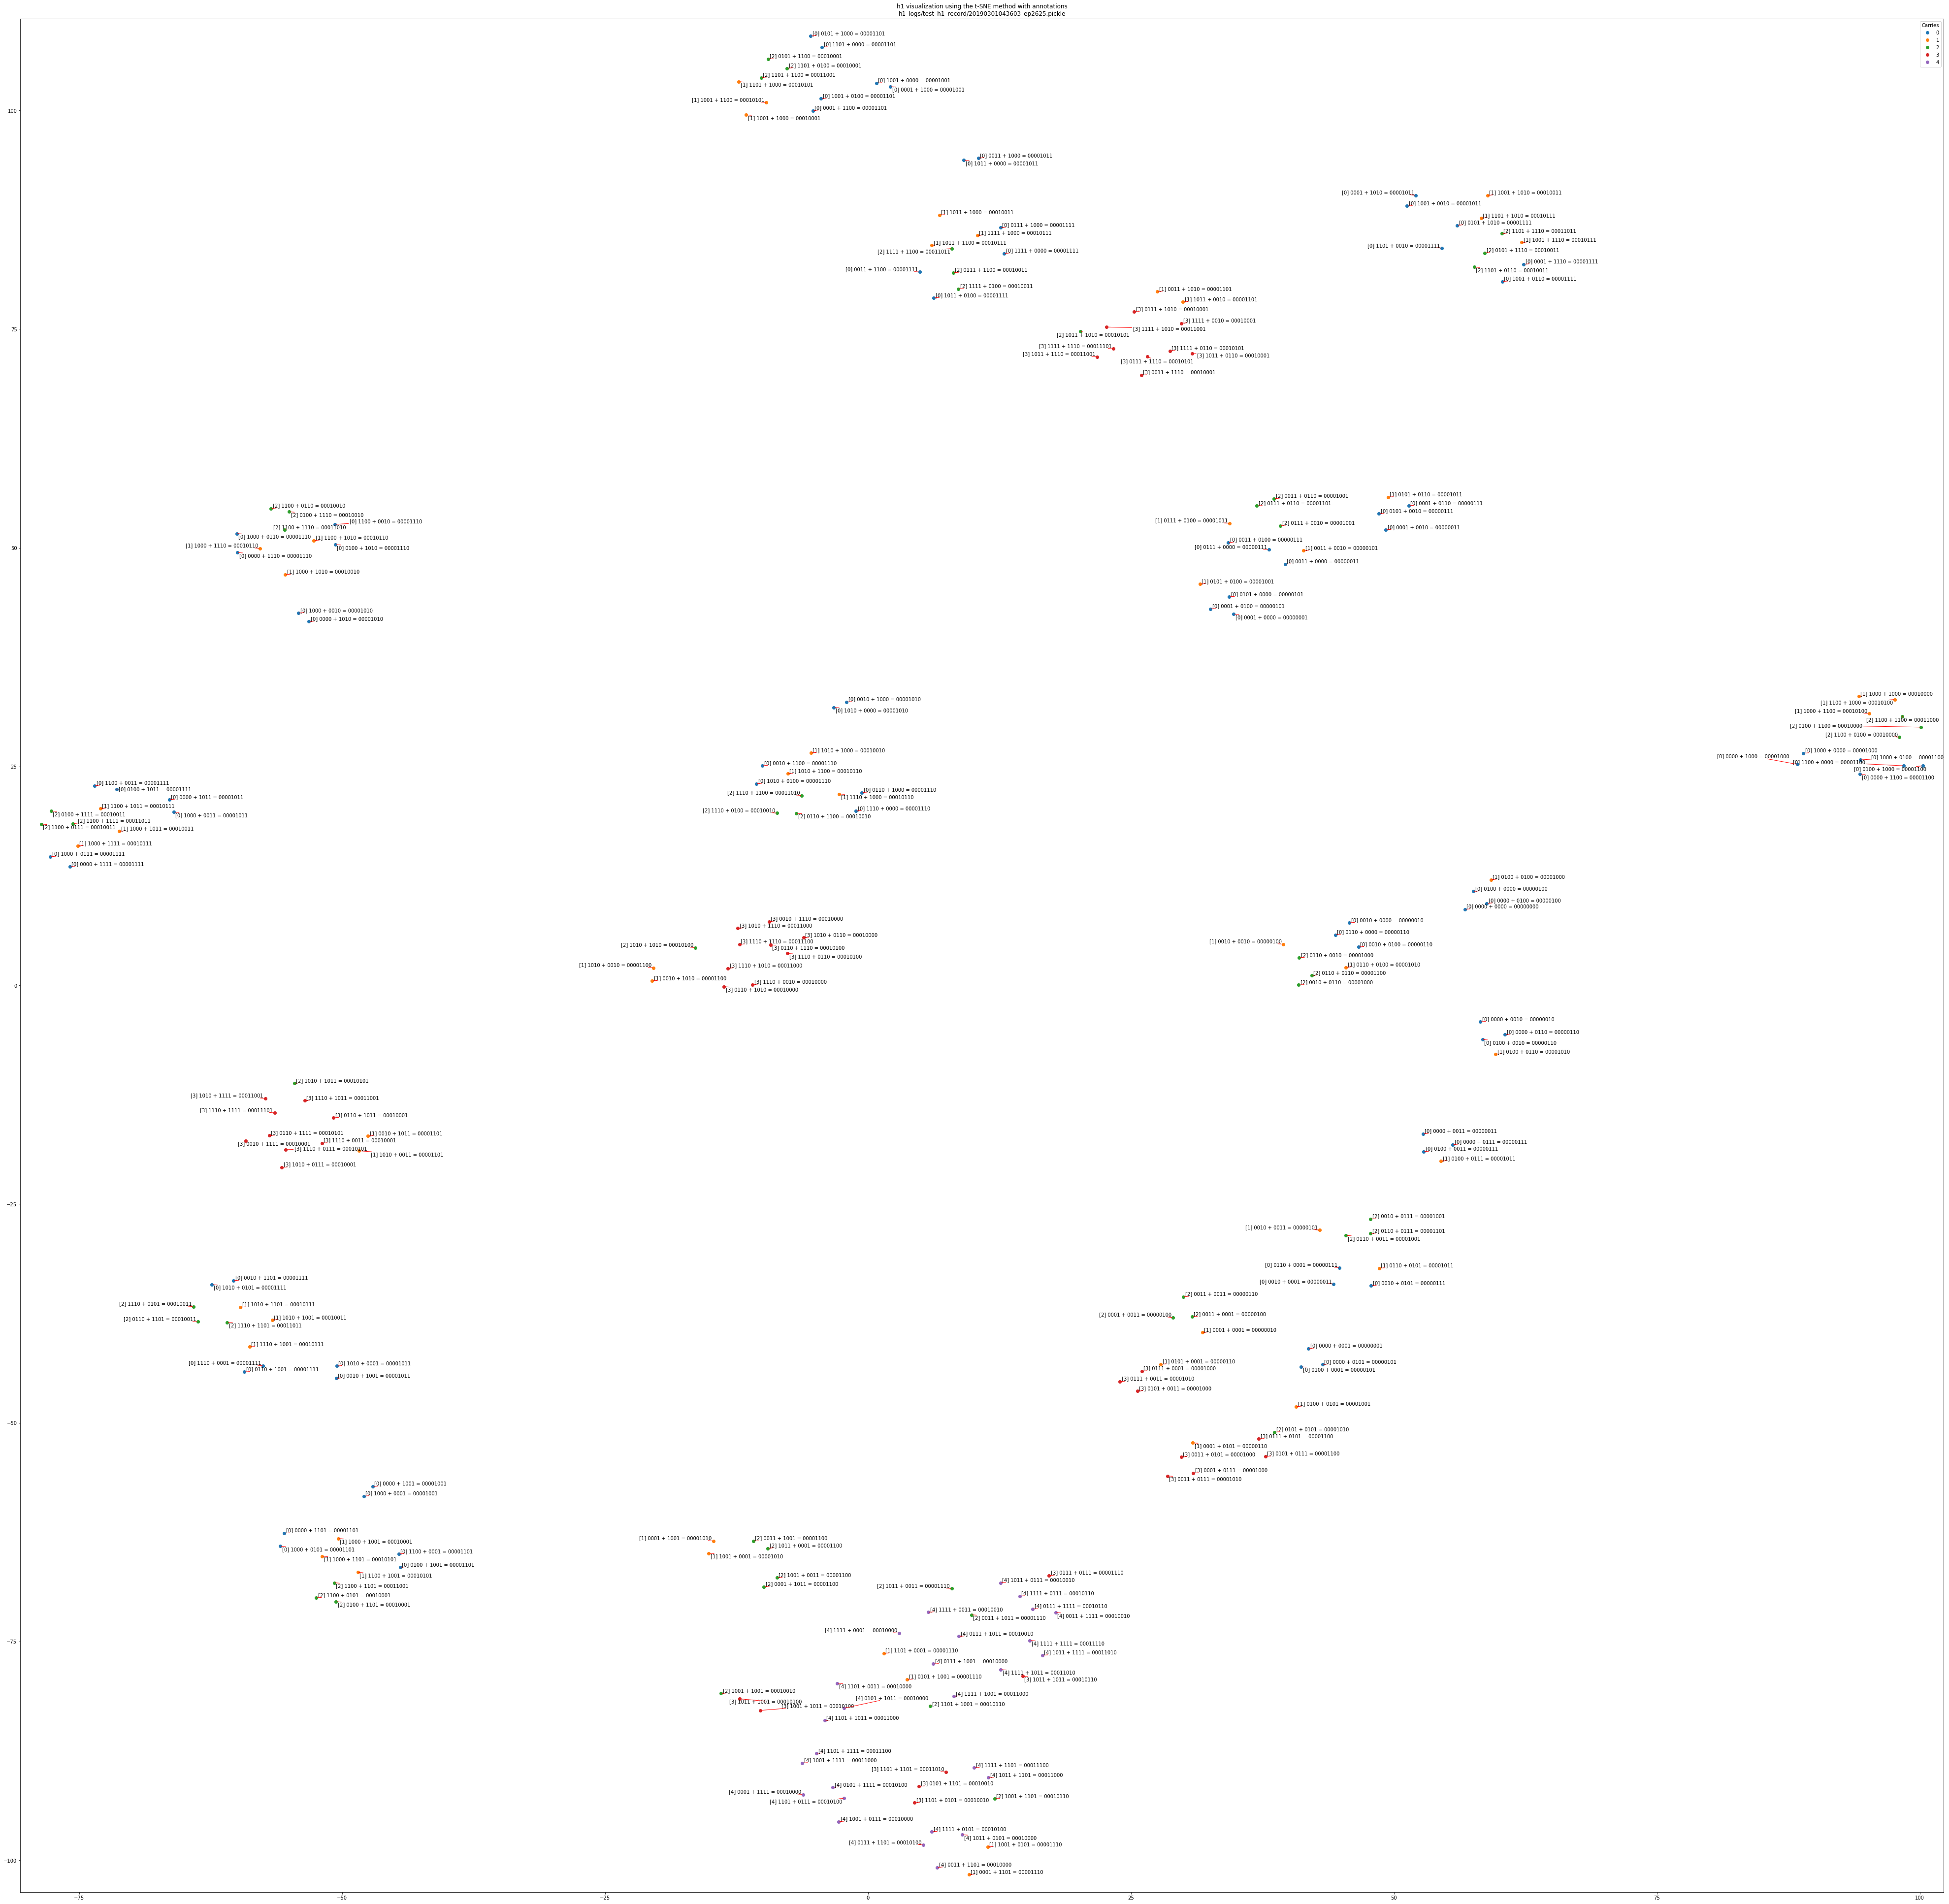

In [543]:
# figure configuartion
plt.figure(figsize=(70,70))
pad = 2
plt.xlim(df['x'].min() - pad, df['x'].max() + pad)
plt.ylim(df['y'].min() - pad, df['y'].max() + pad)
plt.title('h1 visualization using the t-SNE method with annotations\n{}'.format(file_path))

# scatter plot
for carries in df['carries'].unique():
    df_carries = df[df['carries'] == carries]
    plt.plot(df_carries['x'], df_carries['y'], 'o', label=carries)

# tag labels
texts = list()
for i in range(len(df)):
    text = plt.text(df['x'][i], df['y'][i], df['op_text'][i], ha='center', va='center')
    texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red'))
plt.legend(title='Carries')
plt.show()    

# Function

In [3]:
import pickle
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import config
import os
import data_utils
from adjustText import adjust_text
from numpy import linalg as LA

def tsne_plot(experiment_name, file_name):
    # Read the pickle file. ===============================================
    file_path = os.path.join(config.dir_h1_logs(), experiment_name, file_name)
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    print('Read {}'.format(file_path))
    
    # t-SNE training =======================================================
    # t-SNE hyperparmeter setting
    tsne = TSNE(n_components=2,  perplexity=5.0, n_iter=100000, init='pca')
    # t-SNE fitting
    X_2d = tsne.fit_transform(data['h1'])
    
    # Create DataFrame containing data to plot. ============================
    # Create annotation texts.
    n_examples = data['h1'].shape[0]
    op_texts = list()
    for i in range(n_examples):
        op_text = '[{carries}] {str_operation}'.format(
            carries=data['carry'][i],
            str_operation=data_utils.np_io2str_op(data['input'][i], data['output'][i], data['operator'])
            )
        op_texts.append(op_text)
    
    # Create DataFrame
    df = pd.DataFrame({
        'x':X_2d[:,0],
        'y':X_2d[:,1],
        'carries':data['carry'],
        'op_text':op_texts
    })
    
    # Plot section ==========================================================    
    # [Plot 1] Carry scatter plot ===========================================
    # figure configuartion
    plt.figure(figsize=(10,10))
    pad = 2
    plt.xlim(df['x'].min() - pad, df['x'].max() + pad)
    plt.ylim(df['y'].min() - pad, df['y'].max() + pad)
    plt.title('h1 visualization using the t-SNE method\n{}'.format(file_path))

    # scatter plot
    for carries in df['carries'].unique():
        df_carries = df[df['carries'] == carries]
        plt.plot(df_carries['x'], df_carries['y'], 'o', label=carries)
    plt.legend(title='Carries')
    plt.show()

    # [Plot 2] Plot with annotations ===========================================
    # figure configuartion
    plt.figure(figsize=(70,70))
    pad = 2
    plt.xlim(df['x'].min() - pad, df['x'].max() + pad)
    plt.ylim(df['y'].min() - pad, df['y'].max() + pad)
    plt.title('h1 visualization using the t-SNE method with annotations\n{}'.format(file_path))

    # scatter plot
    for carries in df['carries'].unique():
        df_carries = df[df['carries'] == carries]
        plt.plot(df_carries['x'], df_carries['y'], 'o', label=carries)

    # tag labels
    texts = list()
    for i in range(len(df)):
        text = plt.text(df['x'][i], df['y'][i], df['op_text'][i], ha='center', va='center')
        texts.append(text)
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red'))
    plt.legend(title='Carries')
    plt.show()    
    

**To test (`run_id`)**
* Add: 20190301043603
* Sub: 20190302201031
* Mul: 20190302201128
* Div: 20190302201148
* Mod: 20190302201207

In [5]:
experiment_name = 'test_h1_record'
file_name = '20190301043603_init_all_correct.pickle' # Add
#file_name = '20190301034150_ep2584.pickle' # Sub
#file_name = '20190301034216_ep2328.pickle' # Div

# Add

Read h1_logs/test_h1_record/20190301043603_ep0.pickle
256
256


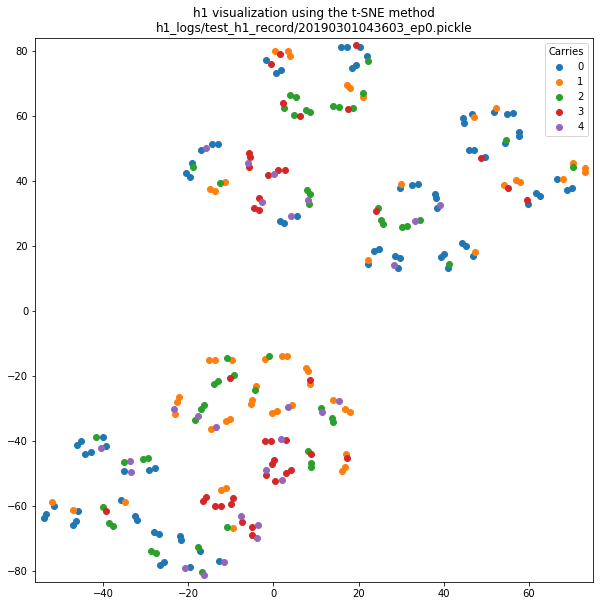

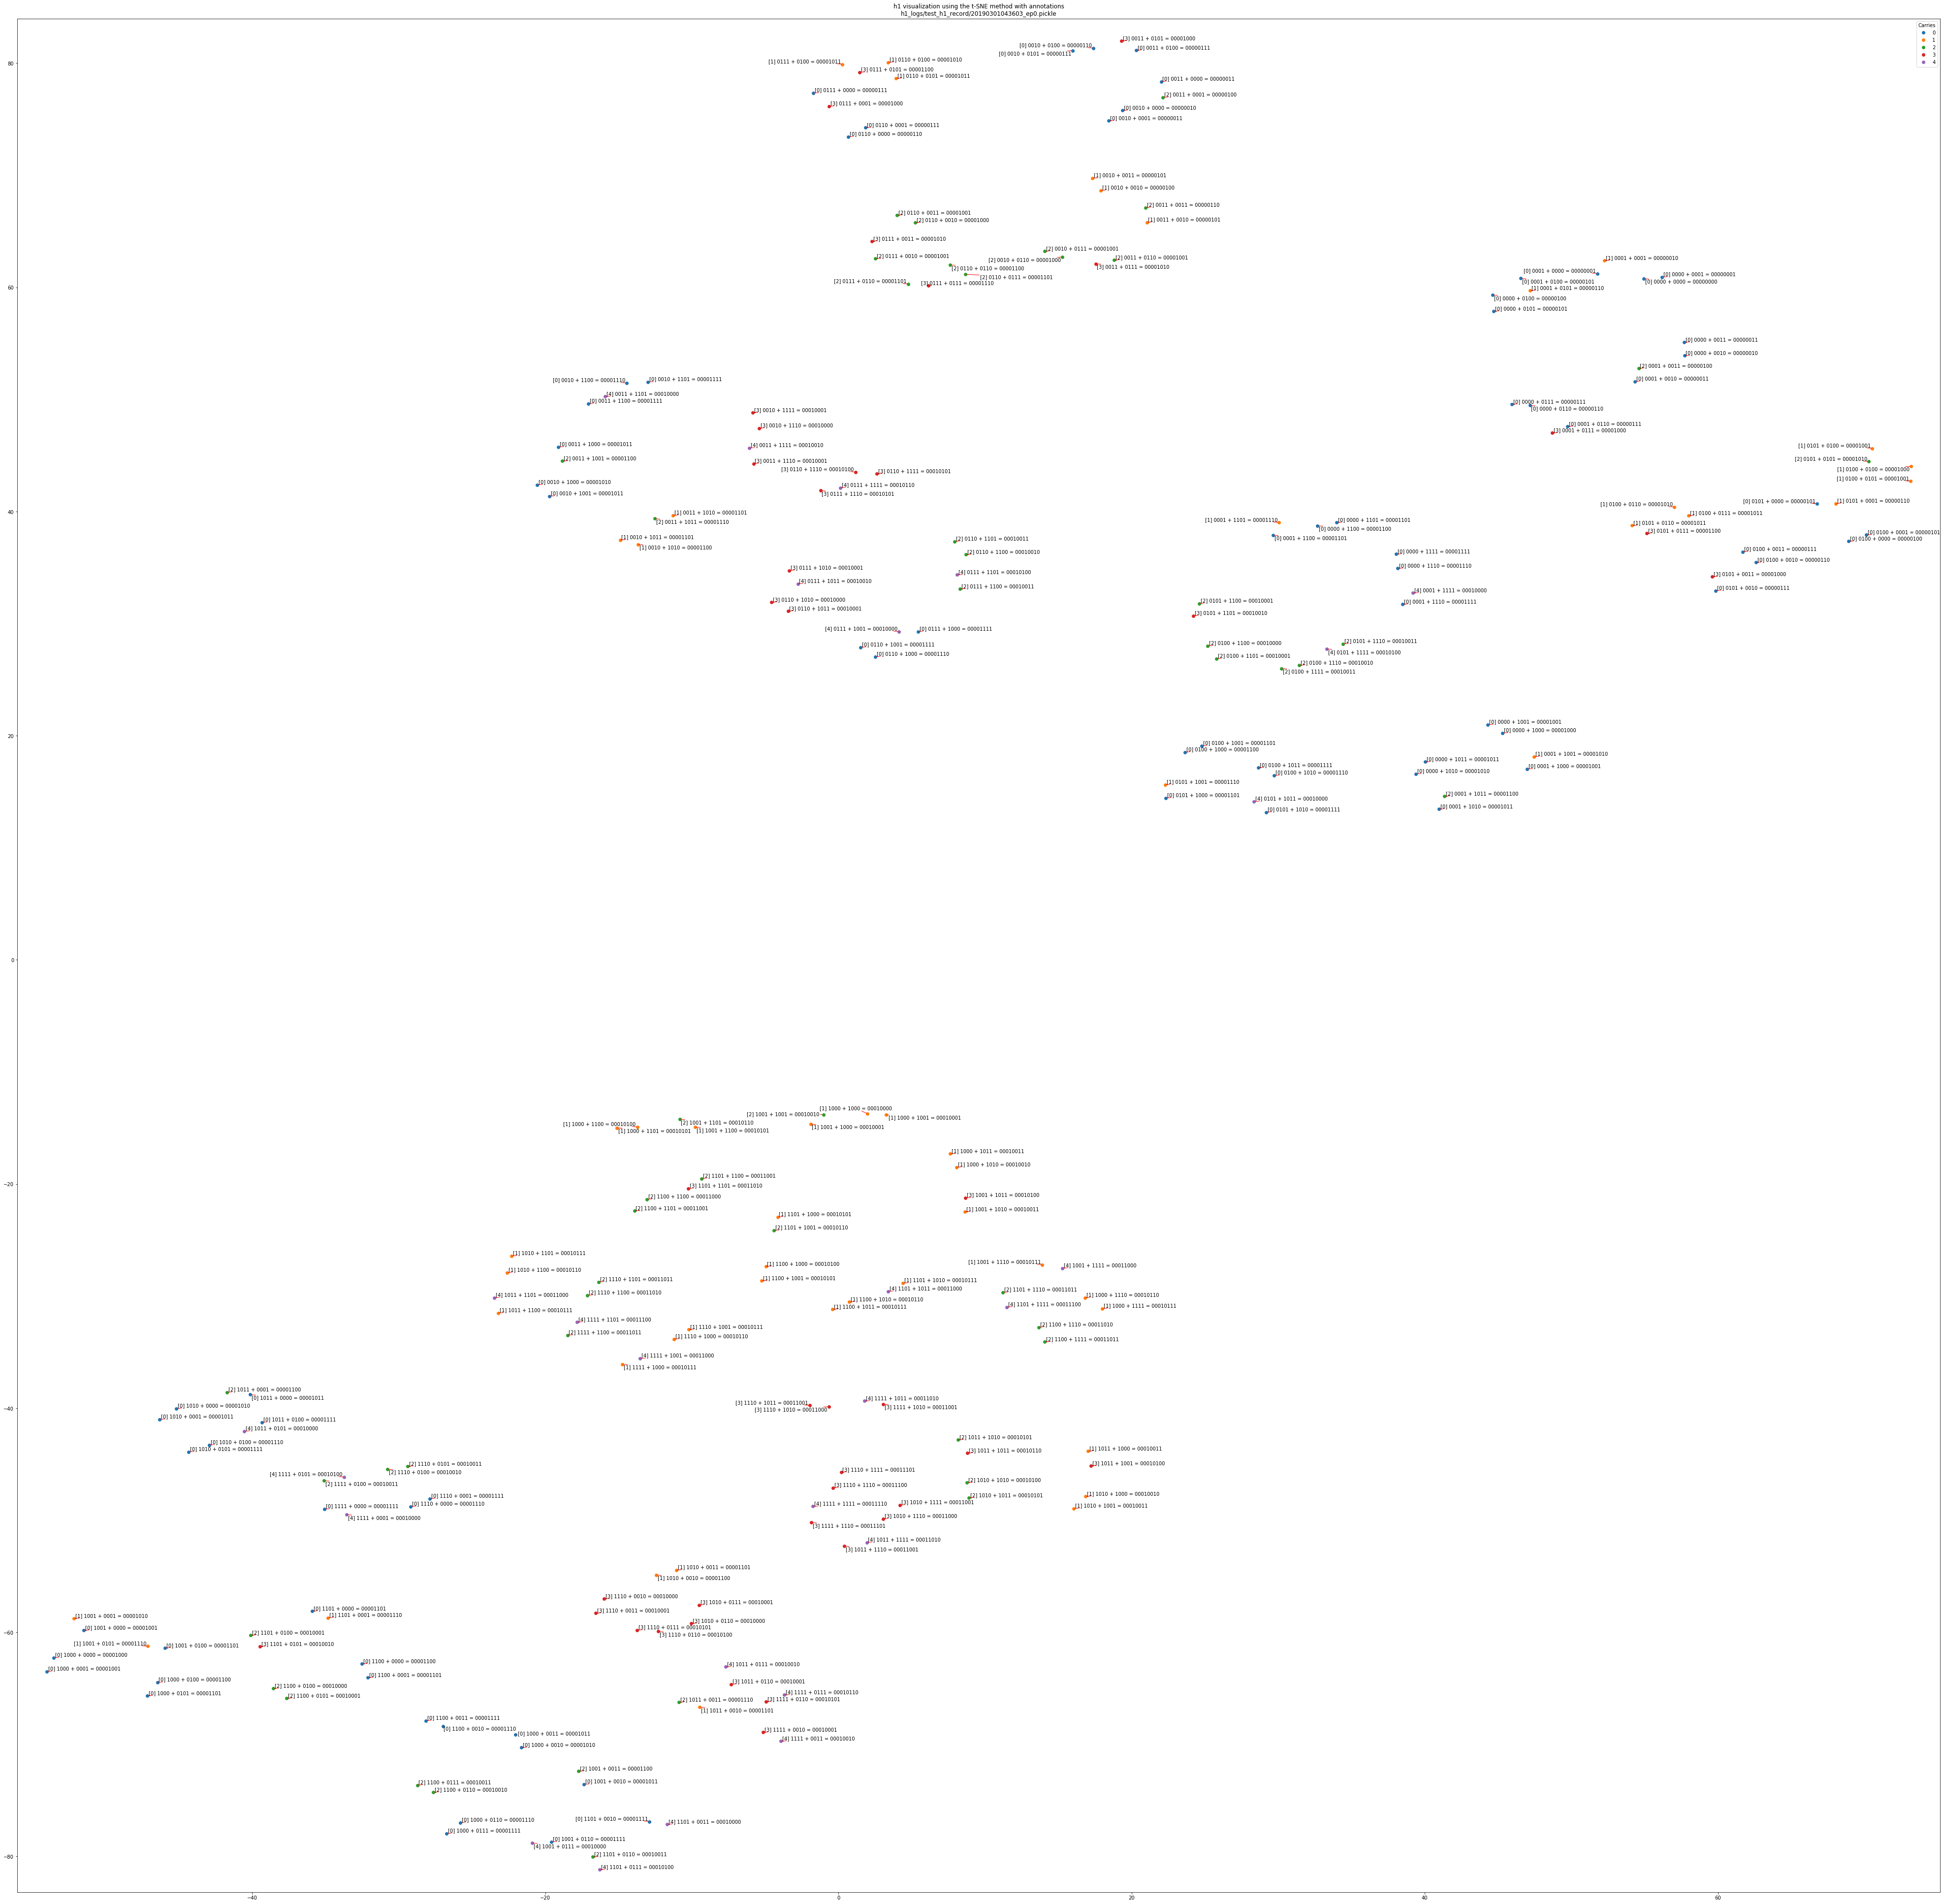

In [546]:
tsne_plot(experiment_name, '20190301043603_ep0.pickle')

Read h1_logs/test_h1_record/20190301043603_ep2625.pickle
256
256


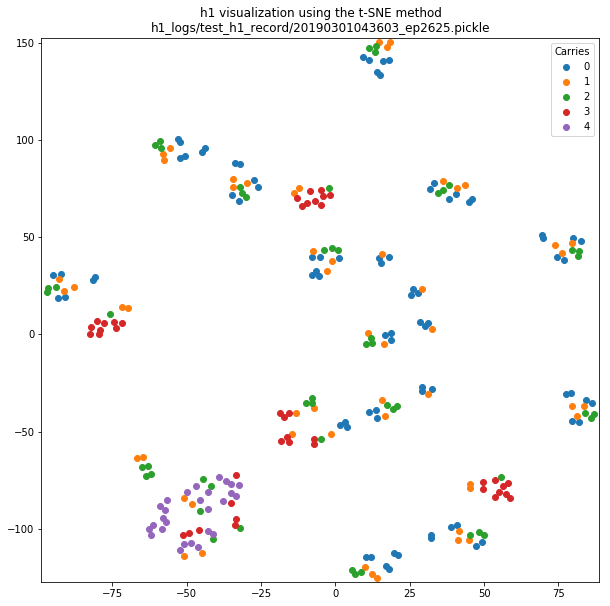

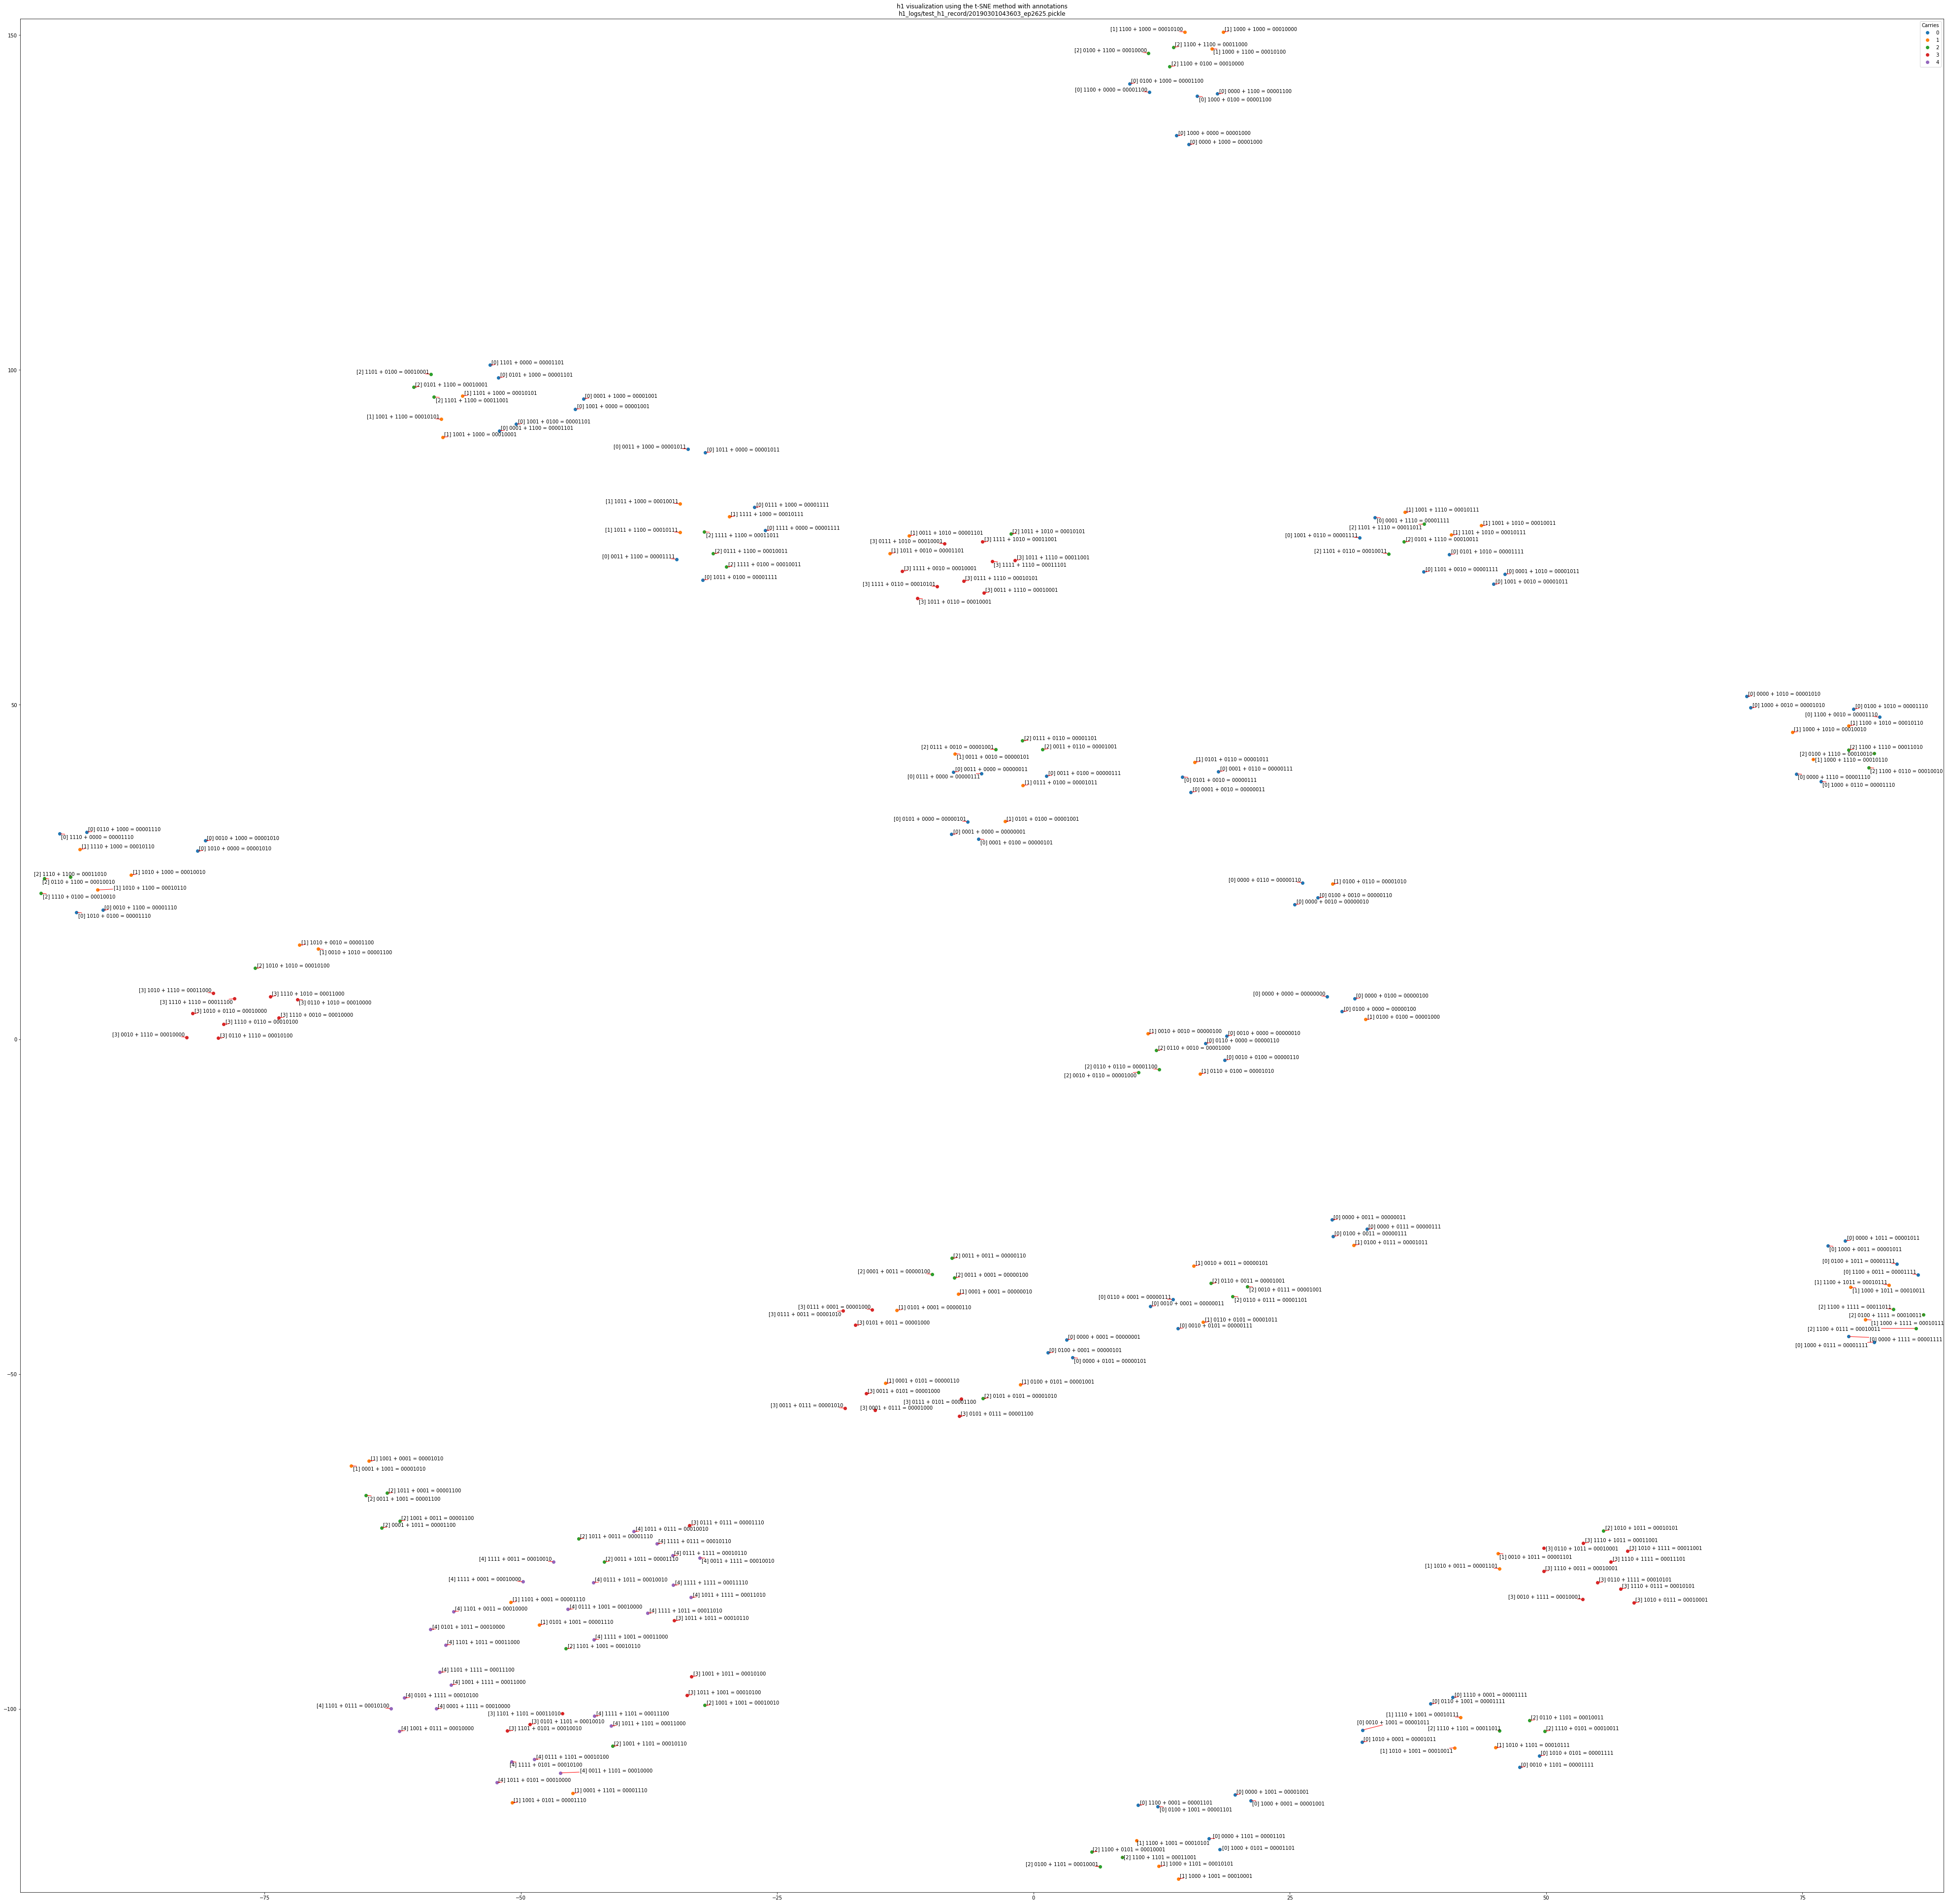

In [547]:
tsne_plot(experiment_name, file_name)

# 2. h1 distance: Squared distance

In [200]:
def np_to_str(np_arr):
    str_num = ''
    n_digits = np_arr.shape[0]
    for i in range(n_digits):
        str_num += str(np_arr[i])
    return str_num

In [238]:
def np_sim(np1, np2):
    sim = np.sum(np1 == np2) / np1.shape[0]
    return sim

In [310]:
experiment_name = 'test_h1_record'
file_name = '20190301043603_ep2625.pickle'
#file_name = '20190301043603_ep0.pickle'
file_path = os.path.join(config.dir_h1_logs(), experiment_name, file_name)
print(file_path)

with open(file_path, 'rb') as f:
    data = pickle.load(f)
print(type(data))

h1_logs/test_h1_record/20190301043603_ep2625.pickle
<class 'dict'>


In [362]:
n_examples = data['input'].shape[0]
col_src_input = list()
col_src_output = list()
col_src_carries = list()
col_dst_input = list()
col_dst_output = list()
col_dst_carries = list()
col_sq_dist = list()
col_sim_input = list()
col_sim_output = list()
col_sim_io_sum = list()
col_sim_io_mul = list()
col_dif_input = list()
col_dif_output = list()
col_dif_io_sum = list()
col_dif_io_mul = list()


for i in range(n_examples):
    for j in range(n_examples):
        if i == j:
            continue
        src_input = np_to_str(data['input'][i])
        src_output = np_to_str(data['output'][i])
        src_carries = data['carry'][i]
        dst_input = np_to_str(data['input'][j])
        dst_output = np_to_str(data['output'][j])
        dst_carries = data['carry'][j]
        
        sq_dist = np.sum(np.square(data['h1'][i] - data['h1'][j]))
        
        sim_input = np_sim(data['input'][i], data['input'][j])
        sim_output = np_sim(data['output'][i], data['output'][j])
        sim_io_sum = sim_input + sim_output
        sim_io_mul = sim_input * sim_output
        
        dif_input = 1 - sim_input
        dif_output = 1 - sim_output
        dif_io_sum = dif_input + dif_input
        dif_io_mul = dif_input * dif_input
        
        # Appending data.
        col_src_input.append(src_input)
        col_src_output.append(src_output)
        col_src_carries.append(src_carries)
        col_dst_input.append(dst_input)
        col_dst_output.append(dst_output) 
        col_dst_carries.append(dst_carries)
        
        col_sq_dist.append(sq_dist)
        
        col_sim_input.append(sim_input)
        col_sim_output.append(sim_output)
        col_sim_io_sum.append(sim_io_sum)
        col_sim_io_mul.append(sim_io_mul)
        
        col_dif_input.append(dif_input)
        col_dif_output.append(dif_output)
        col_dif_io_sum.append(dif_io_sum)
        col_dif_io_mul.append(dif_io_mul)

df = pd.DataFrame({
    'h1_sq_dist':col_sq_dist,
    'src_input':col_src_input,
    'src_output':col_src_output,
    'src_carries':col_src_carries,
    'dst_input':col_dst_input,
    'dst_output':col_dst_output,
    'dst_carries':col_dst_carries,
    'sim_input':col_sim_input,
    'sim_output':col_sim_output,
    'sim_io_sum':col_sim_io_sum,
    'sim_io_mul':col_sim_io_mul,
    'dif_input':col_dif_input,
    'dif_output':col_dif_output,
    'dif_io_sum':col_dif_io_sum,
    'dif_io_mul':col_dif_io_mul
    
}) 
df = df[['src_input', 'src_output', 'src_carries', 
         'dst_input', 'dst_output', 'dst_carries',
         'sim_input', 'sim_output', 'sim_io_sum', 'sim_io_mul',
         'dif_input', 'dif_output', 'dif_io_sum', 'dif_io_mul',
         'h1_sq_dist']]

In [408]:
print(df.sort_values('h1_sq_dist').iloc[range(0, len(df), 2)][:100].to_string())

      src_input src_output  src_carries dst_input dst_output  dst_carries  sim_input  sim_output  sim_io_sum  sim_io_mul  dif_input  dif_output  dif_io_sum  dif_io_mul  h1_sq_dist
60685  01111111   00010110            4  11110111   00010110            4      0.750       1.000       1.750    0.750000      0.250       0.000        0.50    0.062500    0.974229
65262  11111111   00011110            4  01111111   00010110            4      0.875       0.875       1.750    0.765625      0.125       0.125        0.25    0.015625    1.244575
13778  10000000   00001000            0  00001000   00001000            0      0.750       1.000       1.750    0.750000      0.250       0.000        0.50    0.062500    1.292930
15830  10010000   00001001            0  00011000   00001001            0      0.750       1.000       1.750    0.750000      0.250       0.000        0.50    0.062500    1.467054
62219  10111111   00011010            4  11111111   00011110            4      0.875       0.875    

In [394]:
df.sort_values('h1_sq_dist')

,src_input,src_output,src_carries,dst_input,dst_output,dst_carries,sim_input,sim_output,sim_io_sum,sim_io_mul,dif_input,dif_output,dif_io_sum,dif_io_mul,h1_sq_dist
60685,01111111,00010110,4,11110111,00010110,4,0.75,1.0,1.75,0.75,0.25,0.0,0.5,0.0625,0.974229


In [423]:
src_input = '11100001'
print(df[df['src_input'] == src_input]['src_carries'].unique())

[0]


In [424]:
df[df['src_input'] == src_input].sort_values('h1_sq_dist');

# dst_carries

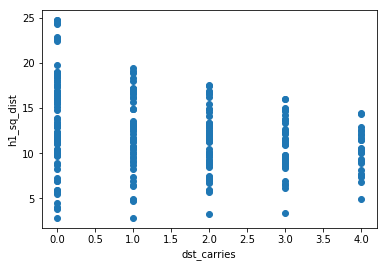

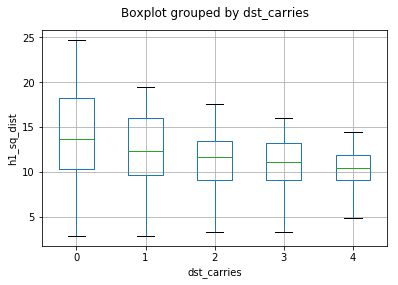

In [425]:
x_col_name = 'dst_carries'
y_col_name = 'h1_sq_dist'
df_plot = df[df['src_input']==src_input].sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

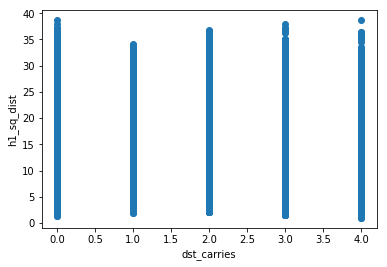

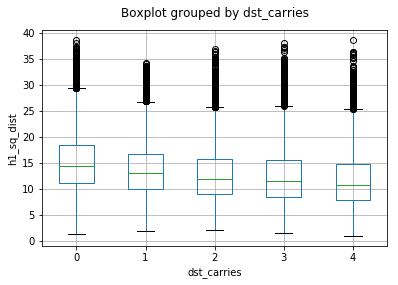

In [417]:
x_col_name = 'dst_carries'
y_col_name = 'h1_sq_dist'
#df_plot = df[df['src_input']==src_input].sort_values(x_col_name)
df_plot = df.sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

# sim_io_sum

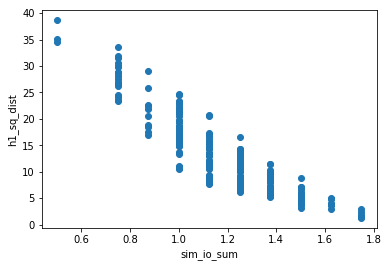

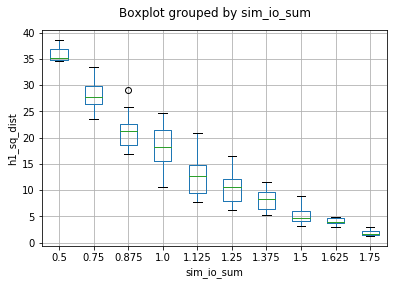

In [411]:
x_col_name = 'sim_io_sum'
y_col_name = 'h1_sq_dist'
df_plot = df[df['src_input']==src_input].sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

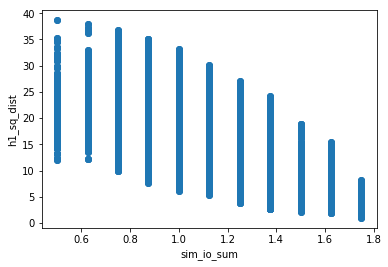

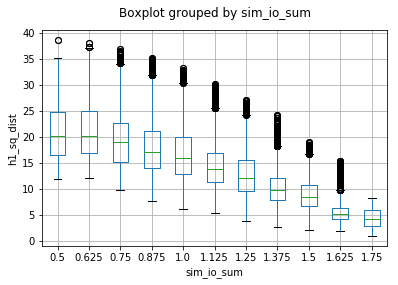

In [419]:
x_col_name = 'sim_io_sum'
y_col_name = 'h1_sq_dist'
#df_plot = df[df['src_input']==src_input].sort_values(x_col_name)
df_plot = df.sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

# sim_io_mul

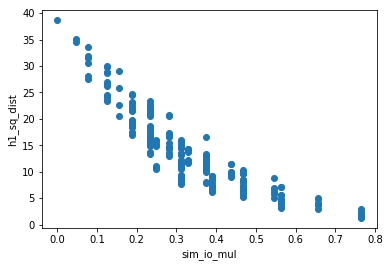

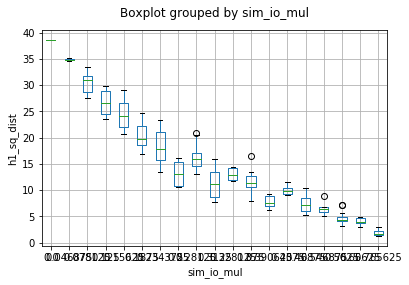

In [412]:
x_col_name = 'sim_io_mul'
y_col_name = 'h1_sq_dist'
df_plot = df[df['src_input']==src_input].sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

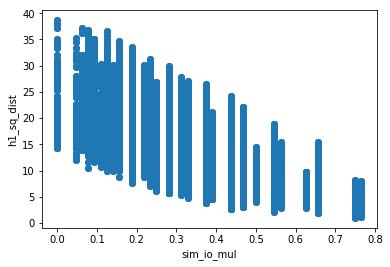

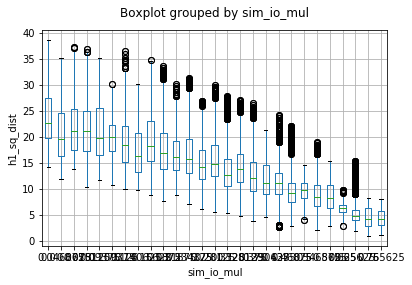

In [418]:
x_col_name = 'sim_io_mul'
y_col_name = 'h1_sq_dist'
#df_plot = df[df['src_input']==src_input].sort_values(x_col_name)
df_plot = df.sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

# sim_input

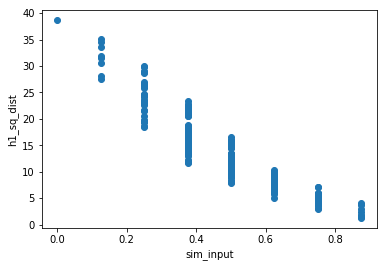

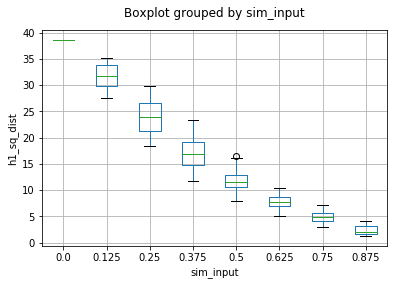

In [413]:
x_col_name = 'sim_input'
y_col_name = 'h1_sq_dist'
df_plot = df[df['src_input']==src_input].sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

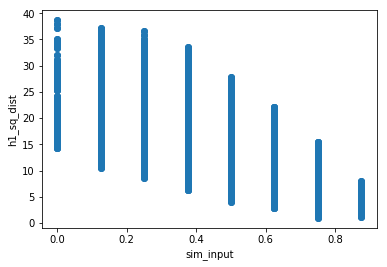

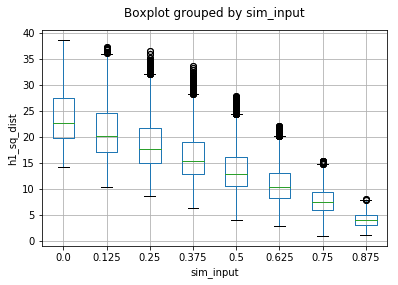

In [420]:
x_col_name = 'sim_input'
y_col_name = 'h1_sq_dist'
#df_plot = df[df['src_input']==src_input].sort_values(x_col_name)
df_plot = df.sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

In [ ]:
for i in range(n_examples):
    src_input = np_to_str(data['input'][i])
    
    x_col_name = 'sim_input'
    y_col_name = 'h1_sq_dist'
    df_plot = df[df['src_input']==src_input].sort_values(x_col_name)

    '''plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.show()'''

    df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.suptitle("")
    plt.title("Input: {}".format(src_input))
    plt.show()

# sim_output

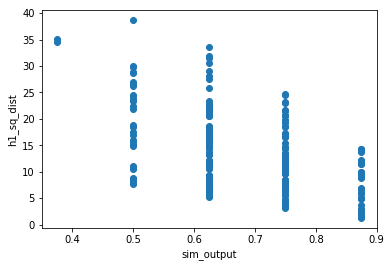

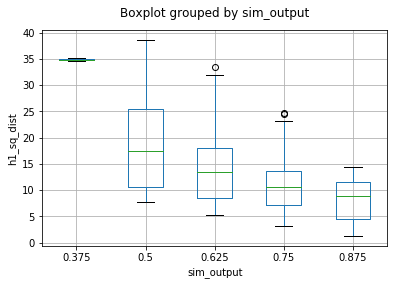

In [414]:
x_col_name = 'sim_output'
y_col_name = 'h1_sq_dist'
df_plot = df[df['src_input']==src_input].sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

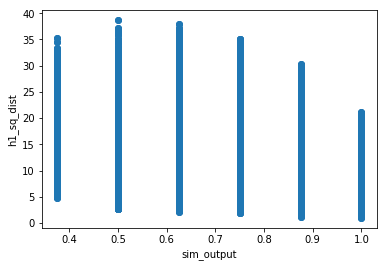

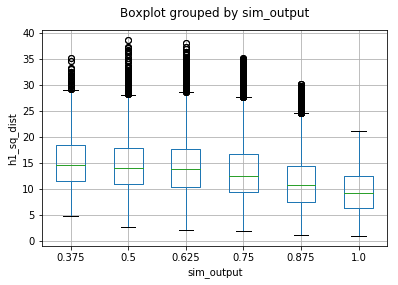

In [421]:
x_col_name = 'sim_output'
y_col_name = 'h1_sq_dist'
#df_plot = df[df['src_input']==src_input].sort_values(x_col_name)
df_plot = df.sort_values(x_col_name)

plt.plot(df_plot[x_col_name], df_plot[y_col_name], 'o')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.show()

df_plot[[x_col_name, y_col_name]].boxplot(by=x_col_name)
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.title("")
plt.show()

## Similarity

In [371]:
sim_cols = ['sim_input', 'sim_output', 'sim_io_sum', 'sim_io_mul', 'h1_sq_dist']

In [379]:
df.query('src_carries == dst_carries').groupby(['src_carries','dst_carries'])[sim_cols].count()

,,sim_input,sim_output,sim_io_sum,sim_io_mul,h1_sq_dist
src_carries,dst_carries,,,,,
0,0,6480,6480,6480,6480,6480
1,1,2862,2862,2862,2862,2862
2,2,2652,2652,2652,2652,2652
3,3,1722,1722,1722,1722,1722
4,4,702,702,702,702,702


In [373]:
df.query('src_carries == dst_carries').groupby(['src_carries','dst_carries'])[sim_cols].sum()

,,sim_input,sim_output,sim_io_sum,sim_io_mul,h1_sq_dist
src_carries,dst_carries,,,,,
0,0,3564.0,5022.0,8586.0,2774.2500,90188.090051
1,1,1462.5,1980.0,3442.5,1032.7500,39193.114889
2,2,1341.5,1840.0,3181.5,959.7500,31147.996037
3,3,962.5,1268.0,2230.5,715.2500,15685.652774
4,4,459.0,580.5,1039.5,379.6875,3545.626305


In [374]:
df.query('src_carries == dst_carries').groupby(['src_carries','dst_carries'])[sim_cols].mean()

,,sim_input,sim_output,sim_io_sum,sim_io_mul,h1_sq_dist
src_carries,dst_carries,,,,,
0,0,0.550000,0.775000,1.325000,0.428125,13.917915
1,1,0.511006,0.691824,1.202830,0.360849,13.694310
2,2,0.505845,0.693816,1.199661,0.361897,11.745097
3,3,0.558943,0.736353,1.295296,0.415360,9.108974
4,4,0.653846,0.826923,1.480769,0.540865,5.050750


## Difference = Dissimilarity

In [385]:
dif_cols = ['dif_input', 'dif_output', 'dif_io_sum', 'dif_io_mul', 'h1_sq_dist']

In [375]:
df.query('src_carries == dst_carries').groupby(['src_carries','dst_carries'])[dif_cols].count()

,,dif_input,dif_output,dif_io_sum,dif_io_mul,h1_sq_dist
src_carries,dst_carries,,,,,
0,0,6480,6480,6480,6480,6480
1,1,2862,2862,2862,2862,2862
2,2,2652,2652,2652,2652,2652
3,3,1722,1722,1722,1722,1722
4,4,702,702,702,702,702


In [376]:
df.query('src_carries == dst_carries').groupby(['src_carries','dst_carries'])[dif_cols].sum()

,,dif_input,dif_output,dif_io_sum,dif_io_mul,h1_sq_dist
src_carries,dst_carries,,,,,
0,0,2916.0,1458.0,5832.0,1518.7500,90188.090051
1,1,1399.5,882.0,2799.0,781.8750,39193.114889
2,2,1310.5,812.0,2621.0,749.2500,31147.996037
3,3,759.5,454.0,1519.0,385.8750,15685.652774
4,4,243.0,121.5,486.0,99.5625,3545.626305


In [377]:
df.query('src_carries == dst_carries').groupby(['src_carries','dst_carries'])[dif_cols].mean()

,,dif_input,dif_output,dif_io_sum,dif_io_mul,h1_sq_dist
src_carries,dst_carries,,,,,
0,0,0.450000,0.225000,0.900000,0.234375,13.917915
1,1,0.488994,0.308176,0.977987,0.273192,13.694310
2,2,0.494155,0.306184,0.988311,0.282523,11.745097
3,3,0.441057,0.263647,0.882114,0.224085,9.108974
4,4,0.346154,0.173077,0.692308,0.141827,5.050750


# Conclusion

* The activations of lower layers are similar if input signals are similar.
* The activations of higher layers are similar if output signals are similar.